In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtl
import seaborn as sb

In [2]:
df=pd.read_csv('advertising.csv')

In [3]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [4]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [5]:
X= df.drop(['Sales'],axis = 1).values

In [6]:
y=df['Sales'].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<AxesSubplot:>

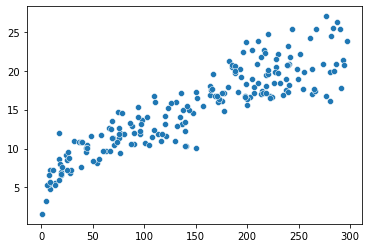

In [8]:
sb.scatterplot(data=X , x=X[:,0] , y=y)




<AxesSubplot:>

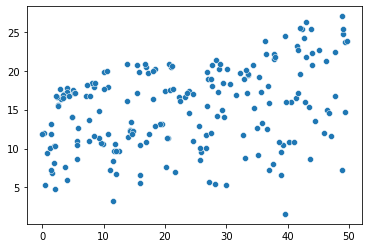

In [9]:
sb.scatterplot(data=X , x=X[:,1] , y=y)

<AxesSubplot:>

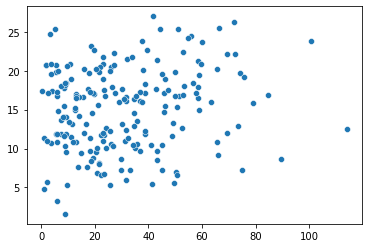

In [10]:
sb.scatterplot(data=X , x=X[:,2] , y=y)

In [11]:
#pearson coefficient is used to check the strength of the linear relationship (r)
#perason method is used when both x,y are continuous

#spearman coreation is used when variables are in ordinal scale(Eg: x=experience in years, y= salary scale 1-5 ,low to high )
#ordinal - data should be in a order 
#nominal = just catagories , not ordre eg: male,female

# p value , H0 - there is no linear relatinship
# if r = -1 strong negative linear relationship  r=+1 strong positive linear relationship r= 0 no linear relationship

#if p value <alpha(0.05) reject H0

# refer this https://realpython.com/numpy-scipy-pandas-correlation-python/


import scipy.stats
tv= X[:,0]
radio = X[:,1]
nws = X[:,2]

r_tv,p_tv = scipy.stats.pearsonr(tv, y)
r_radio,p_radio= scipy.stats.pearsonr(radio, y)
r_nws,p_nws= scipy.stats.pearsonr(nws, y)

print(f"tv_r : {r_tv}")
print(f"tv_p : {p_tv}")
print(f"radio_r : {r_radio}")
print(f"tv_p : {p_radio}")
print(f"nws_r : {r_nws}")
print(f"nws_p : {p_nws}")

tv_r : 0.9012079133023309
tv_p : 7.927911625320818e-74
radio_r : 0.34963109700766926
tv_p : 3.882892364494171e-07
nws_r : 0.1579600261549263
nws_p : 0.025487444306997908


In [12]:
#statmopdels is used to check the detailed summary 

import statsmodels.api as sm
x = sm.add_constant(X_train)
est = sm.OLS(y_train, x)
est2 = est.fit()
print(est2.summary())

# Prob (F-statistic)​ h0: beta_i = 0 for all i , H1:beta_i <>0 for atleast one i
# if this pvalue (Prob (F-statistic): ) is less than 0.05 reject H0 ,there is atlease 1 x_i which can be used 
#to explain the variation of y. then the regressin is sigificant
#if the regresion is significant then we test the significance of each beta


#h0 beta_i = 0 vs H1=beta_i <> 0
# if p value <0.05 reject Ho, beta_i is significant , it is important to have x_i in the model 
# then variation of y can be explained by x_i to a certain extent 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     374.3
Date:                Sun, 26 Sep 2021   Prob (F-statistic):           1.69e-65
Time:                        15:29:09   Log-Likelihood:                -271.70
No. Observations:                 140   AIC:                             551.4
Df Residuals:                     136   BIC:                             563.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7438      0.400     11.863      0.0

In [13]:
x

array([[  1. , 284.3,  10.6,   6.4],
       [  1. , 184.9,  21. ,  22. ],
       [  1. , 112.9,  17.4,  38.6],
       [  1. ,  23.8,  35.1,  65.9],
       [  1. , 290.7,   4.1,   8.5],
       [  1. ,  19.4,  16. ,  22.3],
       [  1. , 293.6,  27.7,   1.8],
       [  1. ,  18.7,  12.1,  23.4],
       [  1. , 134.3,   4.9,   9.3],
       [  1. ,  25.6,  39. ,   9.3],
       [  1. , 100.4,   9.6,   3.6],
       [  1. ,  80.2,   0. ,   9.2],
       [  1. , 188.4,  18.1,  25.6],
       [  1. , 177. ,  33.4,  38.7],
       [  1. , 125.7,  36.9,  79.2],
       [  1. , 209.6,  20.6,  10.7],
       [  1. , 142.9,  29.3,  12.6],
       [  1. , 184.9,  43.9,   1.7],
       [  1. , 222.4,   4.3,  49.8],
       [  1. , 241.7,  38. ,  23.2],
       [  1. ,  17.2,  45.9,  69.3],
       [  1. , 120.5,  28.5,  14.2],
       [  1. ,  89.7,   9.9,  35.7],
       [  1. , 191.1,  28.7,  18.2],
       [  1. ,  75.5,  10.8,   6. ],
       [  1. , 193.2,  18.4,  65.7],
       [  1. ,  85.7,  35.8,  49.3],
 

In [14]:

from sklearn import linear_model
model = linear_model.LinearRegression()
model_fit = model.fit(X_train,y_train)

In [15]:
model_fit.coef_


array([0.05358869, 0.10270677, 0.00793167])

In [16]:
model_fit.intercept_

4.743766701589687

In [17]:
model_fit.score(X,y)

0.9010094306195092

In [18]:
f_results = model_fit.predict(X_test)

In [19]:
f_results

array([17.15991908, 20.53369503, 23.68914396,  9.5191455 , 21.60736836,
       12.78101318, 21.08636345,  8.76054246, 17.11499951, 16.68789636,
        8.97584663,  8.57645026, 18.33212325,  8.17863567, 12.64605571,
       14.94486946,  8.34939536, 17.83858948, 11.12172174, 20.37740648,
       20.9483297 , 13.04035779, 11.01360656, 22.51142595,  9.40369784,
        7.98591291, 20.86943368, 13.77882255, 10.83407064,  8.00419229,
       15.88597618, 10.7027424 , 20.9521718 , 10.84679243, 21.50720813,
       21.07347295, 12.22673775, 22.85273767, 12.57698182,  6.54597206,
       11.93411853, 15.23490068, 10.07411153,  9.52159696, 17.11786382,
        7.28032677, 10.49404864, 15.24356754, 11.20742176, 11.78392665,
       14.01472163, 14.59884572, 10.82722434,  9.55839415,  9.03749681,
       12.51183313, 10.52551021, 25.01900824,  7.99334943, 15.73916263])

In [20]:
error = y_test-f_results

In [21]:
#before using the model it is important to test the model adequacy (if the model is acceptable and satisfying assumptions)
#Assunptions
#=============
#1. Linearity - There should be a linear relationship wih y and x_i

#2. Normality of error terms - f-test is used to check the significant of the model.it assumes that the y values has a 
#F-distribution . but it can not be verified . therefore it can be tested by using the errors. if the errors are normally 
# distributed y has a f distribution

#3.No multicollinearity amoung predicators - there are no relationships between x_i variable

#4. no autocorelation between errors

#5. Homoscedasticity
#This assumes homoscedasticity, which is the same variance within our error terms. Heteroscedasticity, the violation of
#homoscedasticity, occurs when we don’t have an even variance across the error terms.


# https://jeffmacaluso.github.io/post/LinearRegressionAssumptions/

In [22]:
# y_results gives you predicted results for  x_train data set

In [24]:
y_results = model_fit.predict(X_train)

In [25]:
err= y_train - y_results

<AxesSubplot:>

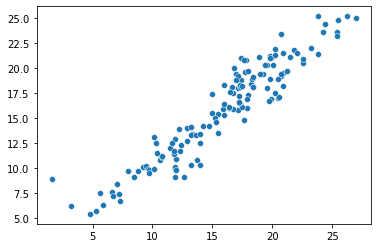

In [29]:
#checking assumption 1 
# if there is linear relation of x exist with y then we can use the results of the model and plot against actual y
# to see if there exist a linear relation

sb.scatterplot(x= y_train, y=y_results)
# there is a liner relationship

In [33]:
# it is assumed that if the mean of the errors are are close to zero there exit a linear relationship between the variables
est2.resid.mean()

#this is close to zero .. Therefore there exist a linear relatinship

-1.1546319456101628e-15

In [40]:
#Assumption 2
# you can use Anderson and Darling test or shapiro Wilks test

# Anderson Darling test
from statsmodels.stats.diagnostic import normal_ad
p_value = normal_ad(est2.resid, axis=0)[1]
print('p-value from the test - below 0.05 generally means non-normal:', p_value)
    
# Reporting the normality of the residuals
if p_value < 0.05:
    print('Residuals are not normally distributed')
else:
    print('Residuals are normally distributed')

p-value from the test - below 0.05 generally means non-normal: 0.1891434536607328
Residuals are normally distributed


In [42]:
# Assumption 3 checking for multicolinearity

#Use VIF method to check this

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = ['TV','Radio','Newspapers']
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train, i)
                          for i in range(3)]
  
print(vif_data)

#VIF <max (10, 1/(1-R^2))
#then there is no multicolinerity

# here VIF is less than 10. so no multicolinerity

      feature       VIF
0          TV  2.697679
1       Radio  3.473818
2  Newspapers  3.162643


In [43]:
#Auusumption 4 No Autocorrelation of the Error TermsPermalink
#use Durbin Watson test
#'Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
#0 to 2<d is positive autocorrelation
#d>2 to 4 is negative autocorrelation

from statsmodels.stats.stattools import durbin_watson
durbinWatson = durbin_watson(est2.resid)

print('Durbin-Watson:', durbinWatson)
if durbinWatson < 1.5:
   print('Signs of positive autocorrelation', '\n')
   print('Assumption not satisfied')
elif durbinWatson > 2.5:
   print('Signs of negative autocorrelation', '\n')
   print('Assumption not satisfied')
else:
   print('Little to no autocorrelation', '\n')
   print('Assumption satisfied')

Durbin-Watson: 2.106255829752062
Little to no autocorrelation 

Assumption satisfied


In [ ]:
# Assumption 5 - Homoscedasticity
